In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
freq_categories=df["category"]

In [6]:
freq_categories=freq_categories.value_counts().head(5)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_7039/3837676760.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_categories.index, y=freq_categories.values, palette="Set3");


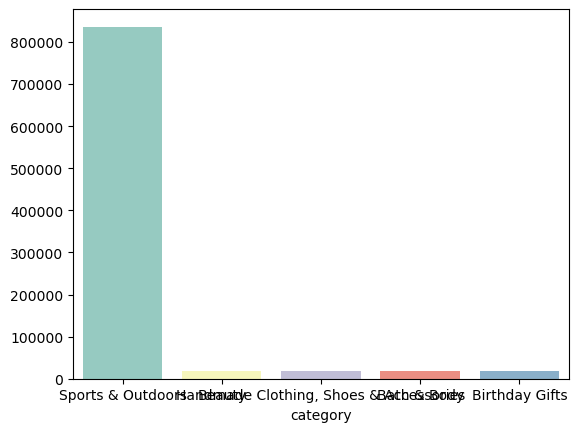

In [8]:
sns.barplot(x=freq_categories.index, y=freq_categories.values, palette="Set3");
plt.show()

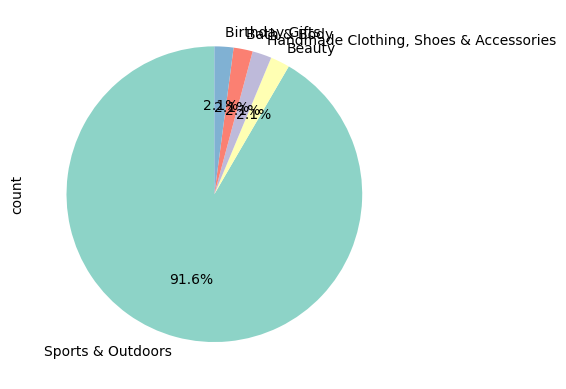

In [12]:
freq_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

**Part 2: Delving into Product Pricing**
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [13]:
price=df["price"]

In [22]:
print("Media", price.mean())
print("Mediana", price.median())
print("Moda", price.mode())

Media 89.24380943923663
Mediana 19.09
Moda 0    9.99
Name: price, dtype: float64


In [29]:
print("Varianza", price.var())
print("Desviacion típica", price.std())
interquantil= price.quantile(0.75)- price.quantile(0.25)
print("Interquantil" ,interquantil)

Varianza 119445.4853225653
Desviacion típica 345.6088617535223
Interquantil 36.0


** How varied are the product prices? Are there any indicators of a significant spread in prices? **

Son muy variados, la variza y desviacion tipica es muy grande

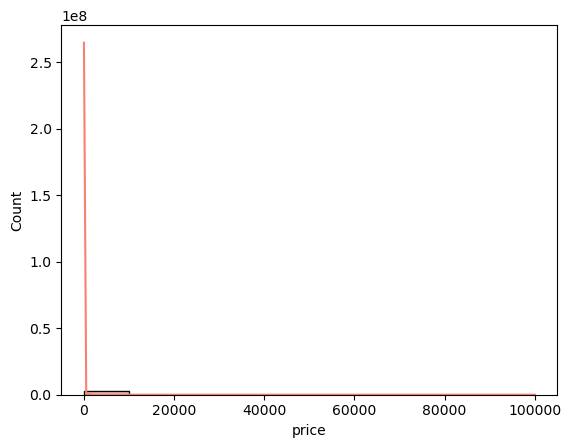

In [35]:
sns.histplot(df['price'], kde=True, bins=10, color="salmon")
plt.show()

La mayoria estan entre 0-1000

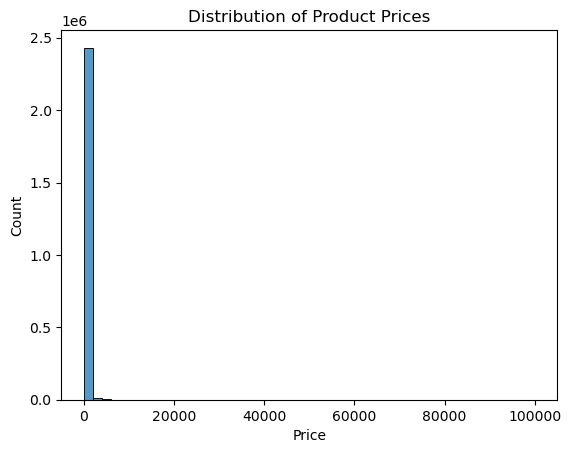

In [38]:

sns.histplot(df["price"], bins=50)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.show()

** Part 3: Unpacking Product Ratings **

In [48]:
rating= df["stars"]

la mayoria son 0, pongo un filtro para que no los cuente

In [49]:
rating= rating[rating > 0]

In [50]:
print("Media", rating.mean())
print("Mediana", rating.median())
print("Moda", rating.mode())

Media 4.31916076222691
Mediana 4.4
Moda 0    4.5
Name: stars, dtype: float64


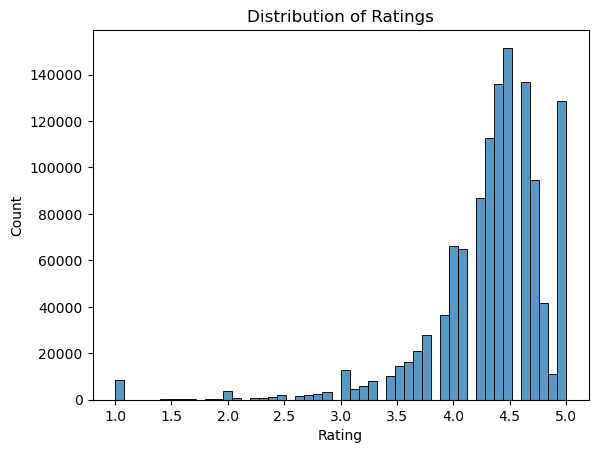

In [51]:
sns.histplot(rating, bins=50)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

In [52]:
print("Varianza", rating.var())
print("Desviacion típica", rating.std())
interquantil= rating.quantile(0.75)- rating.quantile(0.25)
print("Interquantil" ,interquantil)

Varianza 0.30834337523805183
Desviacion típica 0.5552867504614637
Interquantil 0.5


**Are the ratings consistent, or is there a wide variation in customer feedback?**

No es tan variado el rating

In [54]:
skew = rating.skew()
kurt = rating.kurt()

print("Skewness:", skew)
print("Kurtosis:", kurt)

Skewness: -2.3795681122127945
Kurtosis: 9.78193769066435


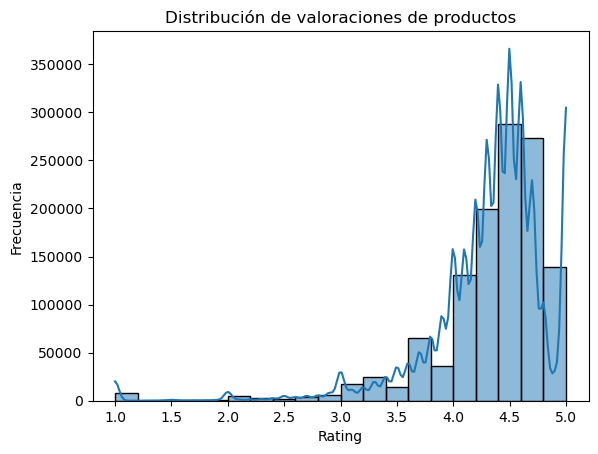

In [56]:
sns.histplot(rating, bins=20, kde=True)
plt.title("Distribución de valoraciones de productos")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()


**Predominan rating altos**